# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

1. Sumber Dataset

Dataset diperoleh dari Kaggle https://www.kaggle.com/datasets/brsahan/data-science-job

2. Ketentuan Dataset

- Tanpa Label:

    Dataset ini tidak memiliki kolom yang jelas menunjukkan **label** atau **kelas**.

- Tipe Data:

    - Kategorikal:
        Kolom seperti `job_title`, `job_category`, `salary_currency`, `experience_level`, `employment_type`, `company_size`, dll.
    - Numerikal:
        Kolom seperti w`ork_year`, `salary`, `salary_in_usd`.
    - Kekosongan Data:

    Beberapa kolom memiliki nilai kosong, seperti `job_category` dan e`xperience_level`, yang perlu diimputasi sebelum analisis.
    - Distribusi Data:

    Dataset mencakup data beragam dari berbagai lokasi (`company_location`, e`mployee_residence`) dan kategori pekerjaan (`job_title`).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('dataset/data_science_job.csv')


In [3]:
df.head()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None


In [5]:
# Menghitung jumlah baris dan kolom
print("\nJumlah baris dan kolom:")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")


Jumlah baris dan kolom:
Jumlah baris: 5000, Jumlah kolom: 12


In [6]:
# Menampilkan tipe data di setiap kolom
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)


Tipe Data Setiap Kolom:
work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object


In [7]:
# Menghitung jumlah nilai hilang di setiap kolom
print("\nJumlah Nilai Hilang di Setiap Kolom:")
print(df.isnull().sum())


Jumlah Nilai Hilang di Setiap Kolom:
work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64


In [8]:
# Menangani nilai hilang (opsional)
df_cleaned = df.dropna(axis=1, how='all')

In [9]:
# Statistik deskriptif untuk kolom numerikal
print("\nStatistik Deskriptif untuk Kolom Numerikal:")
numerical_desc = df_cleaned.describe()
print(numerical_desc)


Statistik Deskriptif untuk Kolom Numerikal:
        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  102046.307200  114076.995800
std       0.81951   70853.626492   49113.807687
min    2020.00000 -198754.000000   30016.000000
25%    2020.00000   64295.500000   71343.750000
50%    2021.00000  110636.000000  114167.000000
75%    2022.00000  153104.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


In [10]:
# Menampilkan tipe data kolom numerikal
print("\nTipe Data Kolom Numerikal:")
print(df_cleaned[numerical_desc.columns].dtypes)



Tipe Data Kolom Numerikal:
work_year        int64
salary           int64
salary_in_usd    int64
dtype: object


In [11]:
# Statistik deskriptif untuk kolom kategorikal
print("\nStatistik Deskriptif untuk Kolom Kategorikal:")
categorical_desc = df_cleaned.describe(include=['object', 'category'])
print(categorical_desc)


Statistik Deskriptif untuk Kolom Kategorikal:
                       job_title  job_category salary_currency  \
count                       5000          4500            4500   
unique                        15             4               5   
top     Data Engineer  in office  Data Science             EUR   
freq                         372          1173             962   

       employee_residence experience_level employment_type work_setting  \
count                5000             4500            5000         5000   
unique                  7                4               4            3   
top                    JP               SE              PT       Hybrid   
freq                  783             1154            1268         1721   

       company_location company_size  
count              5000         4500  
unique                7            3  
top                  UK            S  
freq                789         1519  


In [12]:
# Menampilkan tipe data kolom kategorikal
print("\nTipe Data Kolom Kategorikal:")
print(df_cleaned[categorical_desc.columns].dtypes)



Tipe Data Kolom Kategorikal:
job_title             object
job_category          object
salary_currency       object
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object


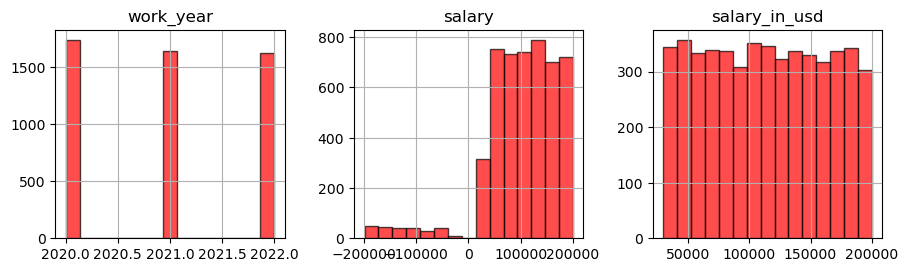

In [13]:
# Visualisasi distribusi untuk kolom numerikal
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int']).columns
df_cleaned[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 5), color='r', alpha=0.7, edgecolor='black')
plt.tight_layout()
plt.show()

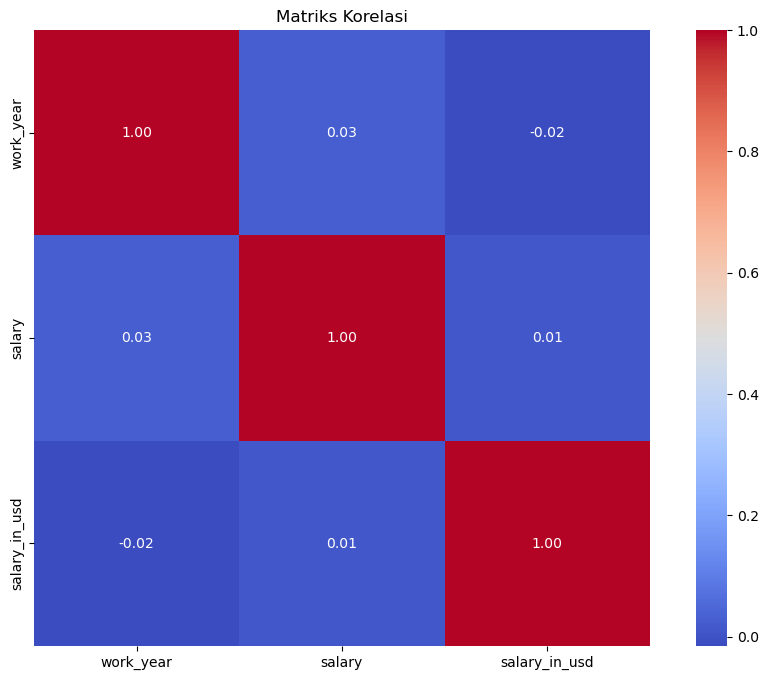

In [14]:
# Visualisasi hubungan antar variabel (misalnya, matriks korelasi)
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


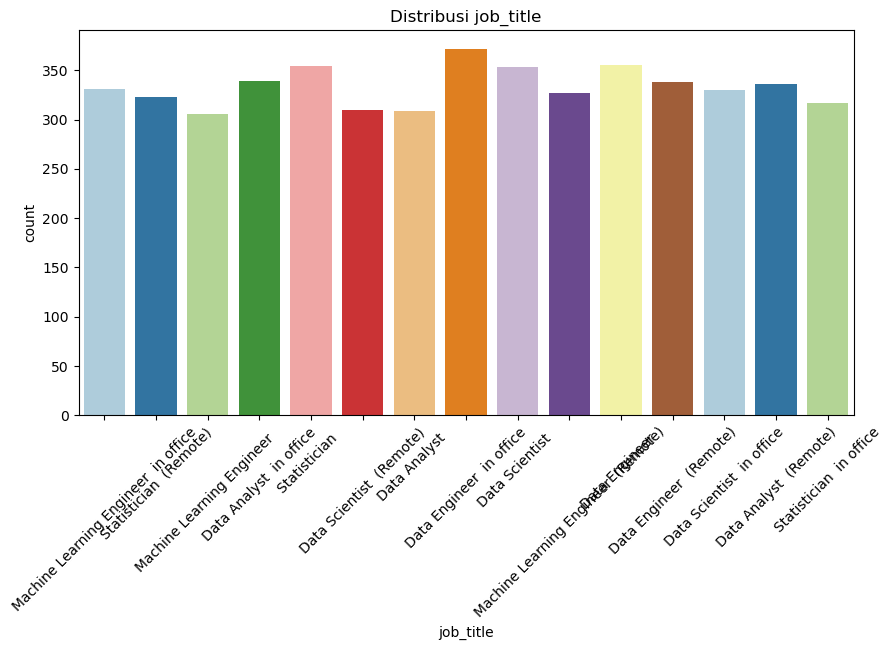

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


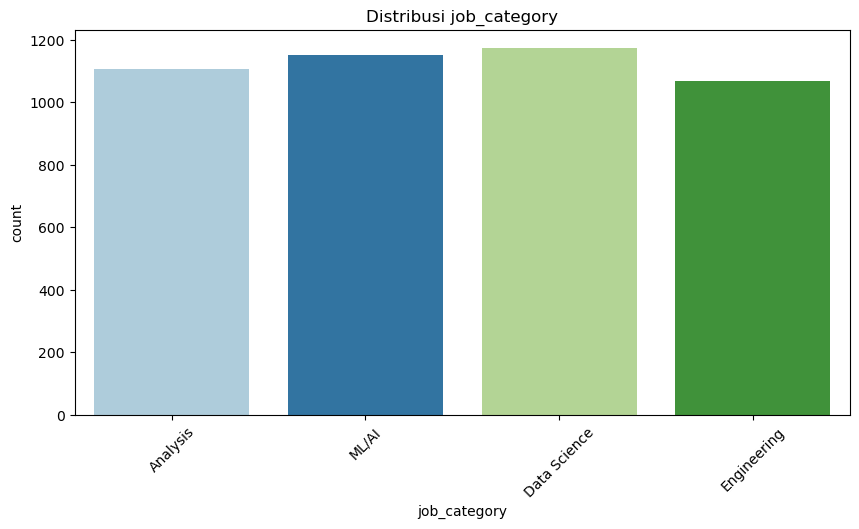

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


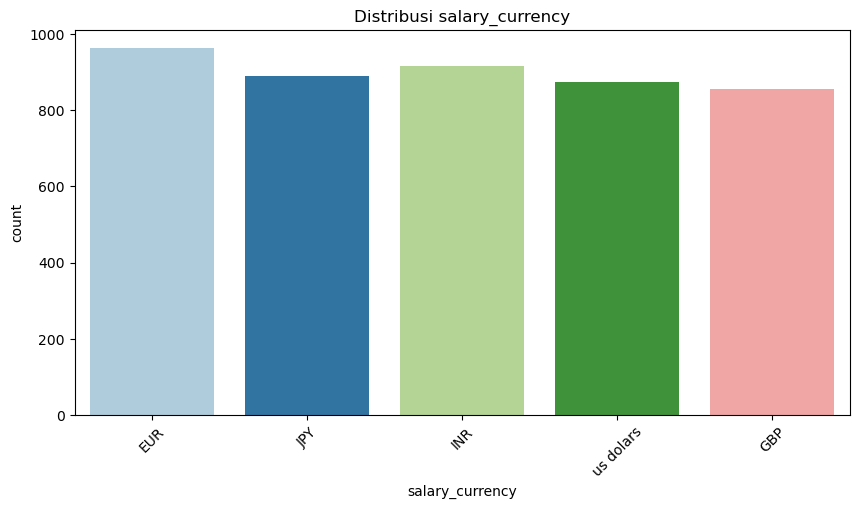

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


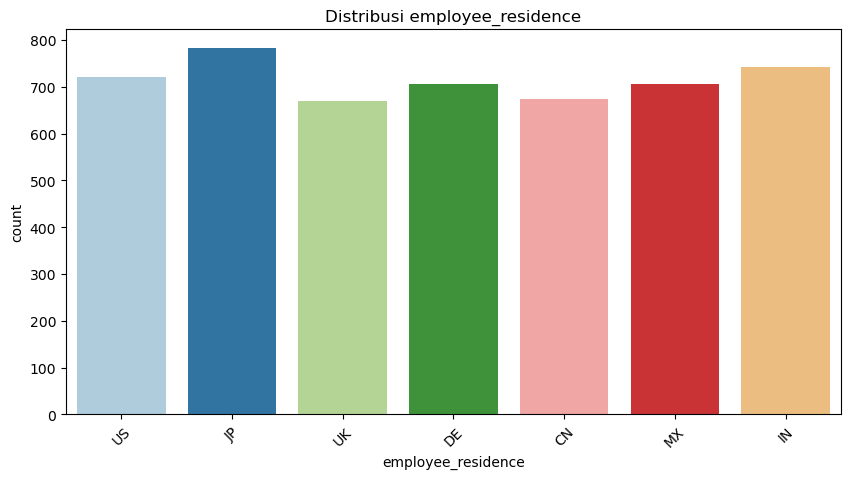

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


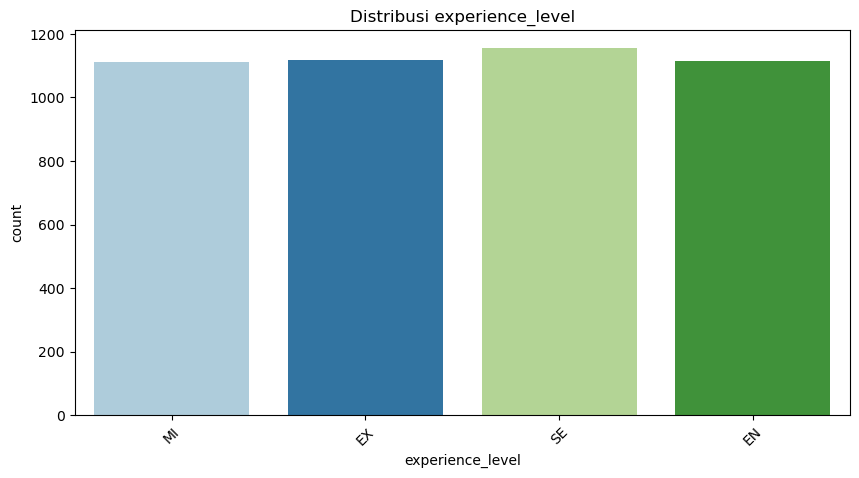

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


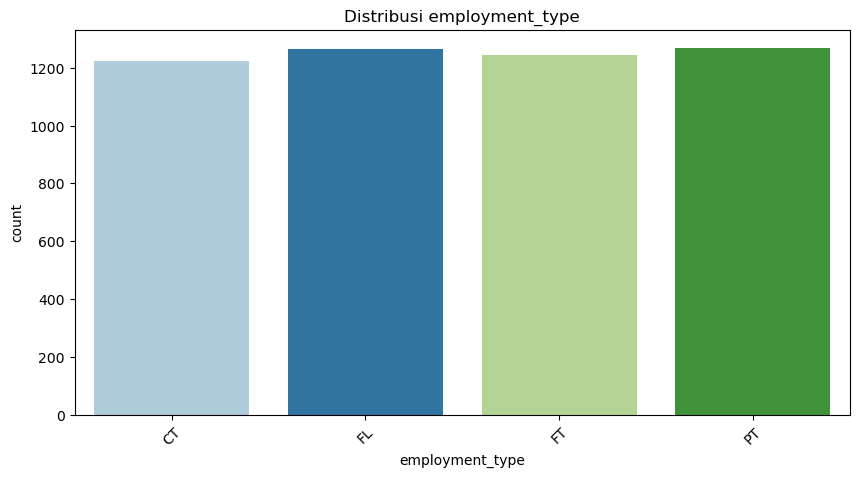

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


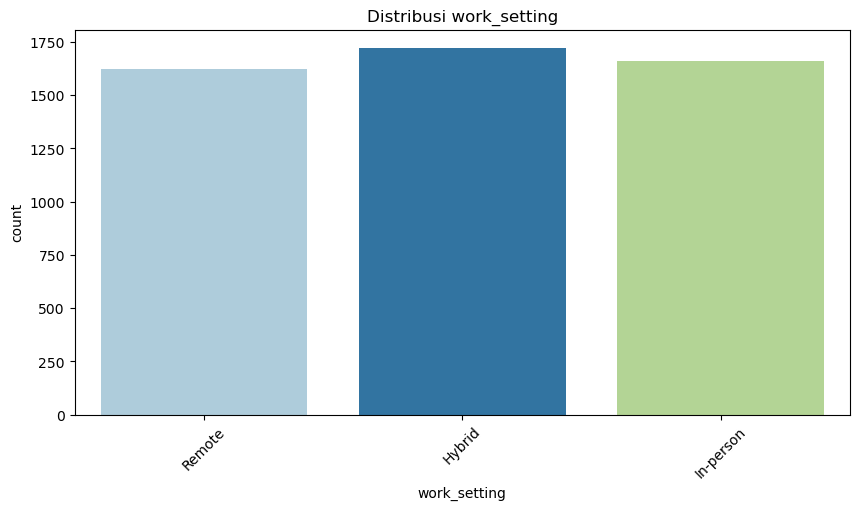

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


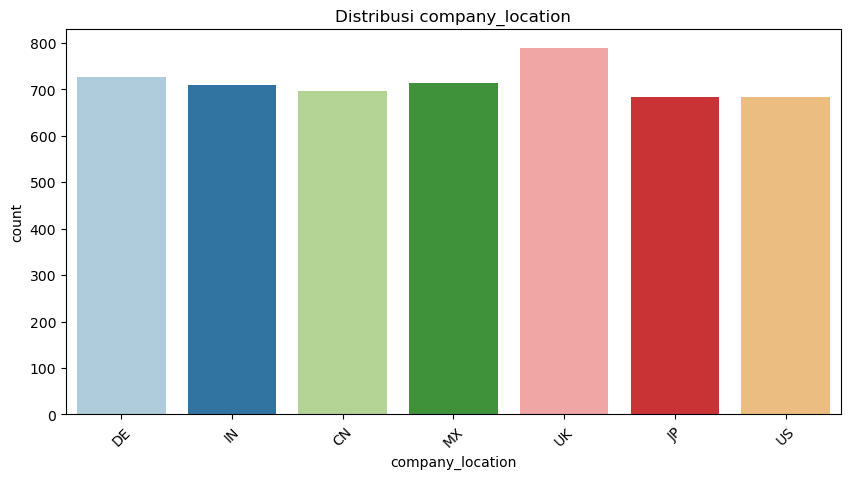

/tmp/ipykernel_62728/746839507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Paired')


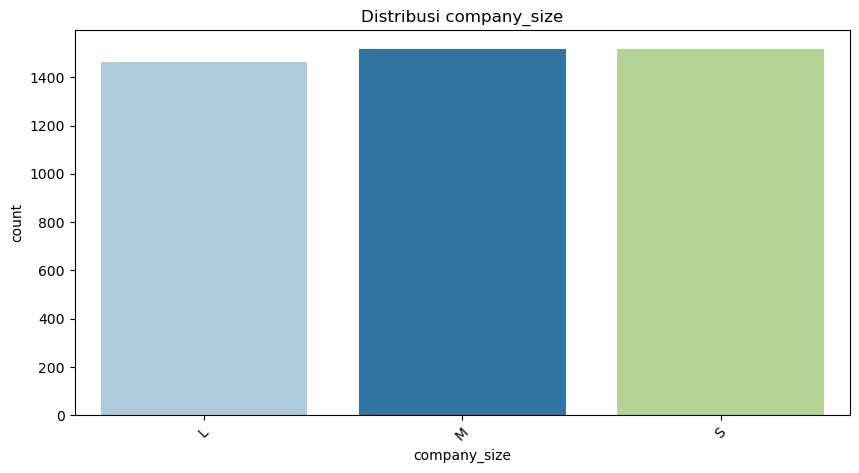

In [15]:
# Visualisasi untuk variabel kategorikal
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=col, palette='Paired')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [16]:
# Mengisi nilai kosong dengan modus untuk kolom kategorikal dan median untuk kolom numerikal
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64']).columns

In [17]:
# Mengisi nilai kosong untuk kolom kategorikal
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [18]:
# Mengisi nilai kosong untuk kolom numerikal
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [19]:
# Menghapus Data Duplikat
df = df.drop_duplicates()

In [20]:
# Pastikan kolom numerikal valid dan tidak ada NaN
numerical_cols = df.select_dtypes(include=['float64']).columns
if len(numerical_cols) == 0:
    print("Tidak ada kolom numerikal untuk dinormalisasi.")
else:
    if df[numerical_cols].isnull().values.any():
        print("Masih ada nilai NaN di kolom numerikal. Silakan periksa pengisian nilai.")
    else:
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Tidak ada kolom numerikal untuk dinormalisasi.


In [21]:
# Deteksi dan Penanganan Outlier
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

for col in numerical_cols:
    df[col] = remove_outliers_iqr(df[col])


In [22]:
# Encoding Data Kategorikal
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [23]:
# Binning (Pengelompokan Data)
bins = [0, 50000, 100000, 150000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

In [24]:
# Menampilkan data setelah dilakukan preprocessing
print("\nData setelah preprocessing:")
print(df.info())
print(df.head())


Data setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   work_year                                       5000 non-null   int64   
 1   salary                                          5000 non-null   int64   
 2   salary_in_usd                                   5000 non-null   int64   
 3   job_title_Data Analyst  (Remote)                5000 non-null   bool    
 4   job_title_Data Analyst  in office               5000 non-null   bool    
 5   job_title_Data Engineer                         5000 non-null   bool    
 6   job_title_Data Engineer  (Remote)               5000 non-null   bool    
 7   job_title_Data Engineer  in office              5000 non-null   bool    
 8   job_title_Data Scientist                        5000 non-null   bool    
 9   j

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [25]:
# Pilih fitur untuk clustering
features = ['work_year', 'salary', 'salary_in_usd', 'job_category_Data Science', 'salary_currency_us dolars']
X = df[features]

In [26]:
# Normalisasi Data
scaler = MinMaxScaler()  # Menggunakan MinMaxScaler
X_scaled = scaler.fit_transform(X)

In [27]:
# PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [28]:
# KMeans Clustering
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, kmeans_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score untuk KMeans dengan {k} cluster: {score}')

Silhouette Score untuk KMeans dengan 2 cluster: 0.591235684224046
Silhouette Score untuk KMeans dengan 3 cluster: 0.6457394279607631
Silhouette Score untuk KMeans dengan 4 cluster: 0.6872095795771074
Silhouette Score untuk KMeans dengan 5 cluster: 0.8110009465441373
Silhouette Score untuk KMeans dengan 6 cluster: 0.8717205894175004
Silhouette Score untuk KMeans dengan 7 cluster: 0.8744174370907792
Silhouette Score untuk KMeans dengan 8 cluster: 0.8761615287325624
Silhouette Score untuk KMeans dengan 9 cluster: 0.8821183922043554


In [29]:
# Tentukan jumlah cluster terbaik
best_k = 5 
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
final_kmeans_labels = final_kmeans.fit_predict(X_pca)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [30]:
# Evaluasi KMeans
final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
print(f'Silhouette Score untuk KMeans dengan {best_k} cluster: {final_silhouette_score}')

Silhouette Score untuk KMeans dengan 5 cluster: 0.8110009465441373


In [31]:
# Analisis cluster
for cluster in range(best_k):
    cluster_points = X_pca[final_kmeans_labels == cluster]
    print(f'Cluster {cluster}: {len(cluster_points)} titik')

Cluster 0: 1106 titik
Cluster 1: 585 titik
Cluster 2: 1153 titik
Cluster 3: 1088 titik
Cluster 4: 1068 titik


In [32]:
inertia = final_kmeans.inertia_
print(f'Inertia untuk KMeans dengan {best_k} cluster: {inertia}')

Inertia untuk KMeans dengan 5 cluster: 88.95211755721695


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [33]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

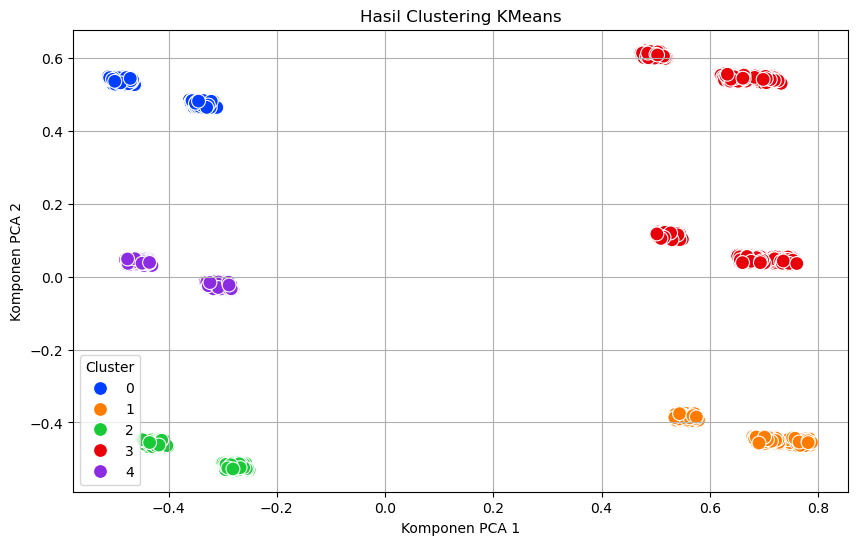

In [34]:
# Visualisasi hasil clustering KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=final_kmeans_labels, palette='bright', s=100)
plt.title('Hasil Clustering KMeans')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [35]:
# Tambahkan label cluster ke DataFrame
df['Cluster'] = final_kmeans_labels

# Analisis karakteristik setiap cluster
cluster_summary = df.groupby('Cluster').agg({
    'work_year': ['mean', 'std', 'count'],
    'salary': ['mean', 'std'],
    'salary_in_usd': ['mean', 'std'],
    'job_category_Data Science': 'mean',
    'salary_currency_us dolars': 'mean'
}).reset_index()

print("Ringkasan Karakteristik Tiap Cluster:")
print(cluster_summary)


Ringkasan Karakteristik Tiap Cluster:
  Cluster    work_year                         salary                 \
                  mean       std count           mean            std   
0       0  2022.000000  0.000000  1106  115293.911392   48704.434267   
1       1  2020.000000  0.000000   585   72874.705983  102907.982736   
2       2  2020.000000  0.000000  1153  113338.566349   49520.216390   
3       3  2021.474265  0.499567  1088   80542.970588   93142.783285   
4       4  2021.000000  0.000000  1068  114021.205993   48788.929246   

   salary_in_usd               job_category_Data Science  \
            mean           std                      mean   
0  111988.658228  48438.489032                       0.0   
1  115769.338462  48915.515516                       1.0   
2  113497.857762  49141.493189                       0.0   
3  113988.502757  49637.731640                       1.0   
4  116028.032772  49337.175046                       0.0   

  salary_currency_us dolars  
      

Hasil interpretasi:

| Cluster | Work Year (Mean) | Work Year (Std) | Count | Salary (Mean) | Salary (Std) | Salary in USD (Mean) | Salary in USD (Std) | Job Category: Data Science (Mean) | Salary in US Dollars (Mean) |
|---------|------------------|-----------------|-------|---------------|--------------|-----------------------|---------------------|------------------------------------|-----------------------------|
| 0       | 2022        | 0.0             | 1106  | 115293.91     | 48704.43     | 111988.66             | 48438.49           | 0.0                                | 0.202532                   |
| 1       | 2020      | 0.0             | 585   | 72874.70      | 102907.98    | 115769.34             | 48915.52           | 1.0                                | 0.140171                   |
| 2       | 2020        | 0.0             | 1153  | 113338.57     | 49520.22     | 113497.86             | 49141.49           | 0.0                                | 0.182134                   |
| 3       | 2021        | 0.5             | 1088  | 80542.97      | 93142.78     | 113988.50             | 49637.73           | 1.0                                | 0.138787                   |
| 4       | 2021        | 0.0             | 1068  | 114021.21     | 48788.93     | 116028.03             | 49337.18           | 0.0                                | 0.194757                   |

### Penjelasan Kolom:
- **Cluster**: Identitas cluster.
- **Work Year (Mean/Std)**: Rata-rata dan standar deviasi tahun kerja dalam cluster.
- **Count**: Jumlah data dalam cluster.
- **Salary (Mean/Std)**: Rata-rata dan standar deviasi gaji dalam mata uang asli.
- **Salary in USD (Mean/Std)**: Rata-rata dan standar deviasi gaji dalam USD.
- **Job Category: Data Science (Mean)**: Proporsi anggota dengan kategori pekerjaan "Data Science".
- **Salary in US Dollars (Mean)**: Proporsi data dengan gaji dalam USD.


### **Kesimpulan dari Hasil Interpretasi**

Berdasarkan hasil clustering yang dilakukan, berikut adalah karakteristik dan interpretasi masing-masing cluster:

---

#### **Cluster 0**
- **Karakteristik**:
  - Rata-rata tahun kerja: **2022** (tahun kerja terbaru, semua data dari tahun 2022).
  - Rata-rata gaji: **$115,293.91** dengan standar deviasi gaji yang rendah (**$48,704.43**).
  - Proporsi kategori pekerjaan "Data Science": **0%** (tidak ada pekerja dari kategori ini).
  - Proporsi gaji dalam USD: **20.25%**.
- **Kesimpulan**: 
  - Cluster ini terdiri dari pekerja dengan pengalaman paling baru (tahun 2022), gaji tinggi, dan mayoritas pekerjaannya bukan dari kategori "Data Science".

---

#### **Cluster 1**
- **Karakteristik**:
  - Rata-rata tahun kerja: **2020** (lebih lama dibanding cluster lain).
  - Rata-rata gaji: **$72,874.70**, dengan standar deviasi gaji yang sangat tinggi (**$102,907.98**).
  - Proporsi kategori pekerjaan "Data Science": **100%** (semua pekerja dalam kategori ini).
  - Proporsi gaji dalam USD: **14.02%**.
- **Kesimpulan**:
  - Cluster ini didominasi oleh pekerja kategori "Data Science" dengan pengalaman lama, namun gaji yang relatif lebih rendah dibanding cluster lainnya.

---

#### **Cluster 2**
- **Karakteristik**:
  - Rata-rata tahun kerja: **2020** (tahun pengalaman lama seperti Cluster 1).
  - Rata-rata gaji: **$113,338.57** dengan standar deviasi menengah (**$49,520.22**).
  - Proporsi kategori pekerjaan "Data Science": **0%**.
  - Proporsi gaji dalam USD: **18.21%**.
- **Kesimpulan**:
  - Cluster ini terdiri dari pekerja dengan pengalaman lama tetapi bukan dari kategori "Data Science". Gaji mereka cukup tinggi dan lebih merata dibanding Cluster 1.

---

#### **Cluster 3**
- **Karakteristik**:
  - Rata-rata tahun kerja: **2021.47** (transisi dari tahun pengalaman lama ke baru).
  - Rata-rata gaji: **$80,542.97**, dengan standar deviasi yang tinggi (**$93,142.78**).
  - Proporsi kategori pekerjaan "Data Science": **100%**.
  - Proporsi gaji dalam USD: **13.88%**.
- **Kesimpulan**:
  - Cluster ini terdiri dari pekerja kategori "Data Science" dengan gaji sedang. Variasi gaji tinggi menunjukkan adanya perbedaan besar antar individu dalam cluster ini.

---

#### **Cluster 4**
- **Karakteristik**:
  - Rata-rata tahun kerja: **2021**.
  - Rata-rata gaji: **$114,021.21**, dengan standar deviasi gaji rendah (**$48,788.93**).
  - Proporsi kategori pekerjaan "Data Science": **0%**.
  - Proporsi gaji dalam USD: **19.48%**.
- **Kesimpulan**:
  - Cluster ini berisi pekerja non-"Data Science" dengan gaji tinggi dan distribusi yang stabil. Mereka memiliki pengalaman yang cukup baru (tahun 2021).

---

### **Kesimpulan Umum**
1. **Dominasi Kategori Pekerjaan**:
   - Cluster 1 dan 3 didominasi oleh kategori "Data Science", sedangkan cluster lainnya (0, 2, 4) tidak mengandung pekerjaan dari kategori ini.
   
2. **Pengalaman Kerja**:
   - Pekerja dengan pengalaman paling baru (tahun 2022) berada di Cluster 0, sedangkan pengalaman lama (tahun 2020) mendominasi Cluster 1 dan 2.

3. **Gaji**:
   - Gaji tertinggi rata-rata berada di Cluster 0, diikuti oleh Cluster 4 dan Cluster 2.
   - Cluster 1 memiliki gaji rata-rata terendah, meskipun mendominasi kategori "Data Science".

4. **Penyebaran Gaji**:
   - Cluster dengan variasi gaji paling besar adalah Cluster 1 dan Cluster 3, menunjukkan adanya ketimpangan dalam distribusi gaji.

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [36]:
# Menyimpan hasil clustering ke dalam DataFrame
df['Cluster'] = final_kmeans_labels

# Menyimpan DataFrame ke file CSV
output_file_path = 'dataset/data_science_job_clustered.csv'
df.to_csv(output_file_path, index=False)

print(f"Hasil clustering telah disimpan ke dalam {output_file_path}")

Hasil clustering telah disimpan ke dalam dataset/data_science_job_clustered.csv
